In [1]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Load and prepare the data

In [2]:
# path to data locations 
data_path_hours = "datasets/hourly_data.csv"
data_path_days = "datasets/daily_data.csv"

In [3]:
# upload data into pandas data frame
data_df = pd.read_csv(data_path_hours)
data_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the cnt column. You can see the first few rows of the data above.

The data includes some categorical variables like season, weather, month. To feed those data to the neural network we need to One-Hot encoding. For this we can use get_dummies() function in pandas. 

In [5]:
from utils import one_hot_encode

categorical_fields = ["mnth", 'season', 'weathersit','hr' , 'weekday']
fields_to_drop = ['mnth', 'season', 'weathersit','hr' , 'weekday', 'instant', 'atemp']

data_df = one_hot_encode(data_df, categorical_fields, fields_to_drop)

In [6]:
data_df.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1/1/2011,0,0,0,0.24,0.81,0.0,3,13,16,...,0,0,0,0,0,0,0,0,0,1
1,1/1/2011,0,0,0,0.22,0.80,0.0,8,32,40,...,0,0,0,0,0,0,0,0,0,1
2,1/1/2011,0,0,0,0.22,0.80,0.0,5,27,32,...,0,0,0,0,0,0,0,0,0,1
3,1/1/2011,0,0,0,0.24,0.75,0.0,3,10,13,...,0,0,0,0,0,0,0,0,0,1
4,1/1/2011,0,0,0,0.24,0.75,0.0,0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [7]:
data_columns = list(data_df.columns)

<AxesSubplot:xlabel='dteday'>

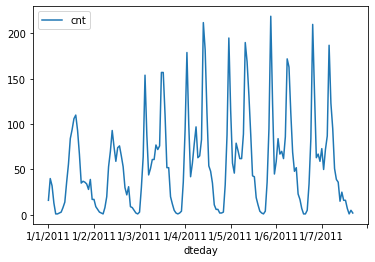

In [8]:
# viewing some data for one week period 
data_df[:24*7].plot(x='dteday', y='cnt')

In [9]:
from utils import train_test_split_df

# divide into training and testing dataframes 
df_train, df_test = train_test_split_df(data_df)


len train df: 13903
len test df: 3476


In [10]:
from utils import standardize
# scale data 
columns_to_scale = ['cnt', 'temp','hum','windspeed']

df_train, scaler = standardize(df_train, columns_to_scale)
df_train.head(3)

C:\Deep_learning_projects\Bike_sharing_prediction\utils.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = scaler.transform(df[columns])


,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1/1/2011,0,0,0,-1.310866,0.943574,-1.57778,3,13,-0.950223,...,0,0,0,0,0,0,0,0,0,1
1,1/1/2011,0,0,0,-1.412024,0.893116,-1.57778,8,32,-0.806467,...,0,0,0,0,0,0,0,0,0,1
2,1/1/2011,0,0,0,-1.412024,0.893116,-1.57778,5,27,-0.854385,...,0,0,0,0,0,0,0,0,0,1


In [11]:
from utils import divide_train_target
# get x,y data for training and testing 
target_fields = ['cnt']
date_fields = ['dteday', 'yr', 'casual', 'registered']

x, y = divide_train_target(df_train, data_columns, date_fields, target_fields)
y.shape

(13903, 1)

In [12]:
from utils import train_validation_split

# split data to train and test
X_train, X_valid, y_train, y_valid = train_validation_split(x, y)

In [13]:
y_valid.shape

(2781, 1)

In [14]:
X_train.shape

(11122, 56)

## Build the network

In [132]:
###### building the tf dense model
model = tf.keras.models.Sequential([
            tf.keras.layers.Input(shape=(56,)),
            tf.keras.layers.Dense(256),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dense(64),
            tf.keras.layers.Dense(1),
])

# WE USE SGD for this problem and specify lr and momentum 
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr): 
  if epoch >= 10: 
    return 0.0001
  else: 
    return 0.001

schedular = tf.keras.callbacks.LearningRateScheduler(schedule)


r = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid,y_valid), callbacks =[schedular])

Epoch 1/20
370/370 [==============================] - 2s 4ms/step - loss: 0.4627 - val_loss: 0.3651 - lr: 0.0010
Epoch 2/20
370/370 [==============================] - 1s 3ms/step - loss: 0.3788 - val_loss: 0.3681 - lr: 0.0010
Epoch 3/20
370/370 [==============================] - 1s 3ms/step - loss: 0.3739 - val_loss: 0.3706 - lr: 0.0010
Epoch 4/20
370/370 [==============================] - 1s 3ms/step - loss: 0.3712 - val_loss: 0.3901 - lr: 0.0010
Epoch 5/20
370/370 [==============================] - 1s 3ms/step - loss: 0.3709 - val_loss: 0.3821 - lr: 0.0010
Epoch 6/20
370/370 [==============================] - 1s 3ms/step - loss: 0.3706 - val_loss: 0.3736 - lr: 0.0010
Epoch 7/20
370/370 [==============================] - 1s 2ms/step - loss: 0.3696 - val_loss: 0.3664 - lr: 0.0010
Epoch 8/20
370/370 [==============================] - 1s 2ms/step - loss: 0.3694 - val_loss: 0.3750 - lr: 0.0010
Epoch 9/20
370/370 [==============================] - 1s 2ms/step - loss: 0.3706 - val_loss: 0.3

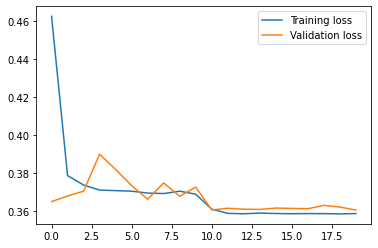

In [137]:
plt.plot(r.history['loss'], label='Training loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

In [134]:
model.predict(X_test)

array([[ 1.3920486 ],
       [-0.31652415],
       [-1.0765582 ],
       ...,
       [-0.1017219 ],
       [ 1.2237763 ],
       [-0.26657495]], dtype=float32)